# Project NLP | Business Case: Automated Customer Reviews

## Task 0. Preprocessing. Map Star Ratings to Sentiment Classes

- Mapping Star Ratings to Sentiment Classes

- Since the dataset contains star ratings (1 to 5), you should map them to three sentiment classes as follows:

Star Rating ----- Sentiment Class

1 - 2       -----  Negative

3           -----  Neutral

4 - 5       -----  Positive

This is a simple approach, but you are encouraged to experiment with different mappings!

In [1]:
import pandas as pd
#
# Load data
df = pd.read_csv("/content/drive/MyDrive/ProjectNLP /Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

# Display the first 5 rows to scan columns
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [3]:
# Extract only important columns, features and target
data = df[["reviews.text", "reviews.rating"]].copy() # we do .copy() to create a new object -> safer with pandas this ways
data.head()

,reviews.text,reviews.rating
0,I thought it would be as big as small paper bu...,3
1,This kindle is light and easy to use especiall...,5
2,Didnt know how much i'd use a kindle so went f...,4
3,I am 100 happy with my purchase. I caught it o...,5
4,Solid entry level Kindle. Great for kids. Gift...,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.text    5000 non-null   object
 1   reviews.rating  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder # Call the label encoder

# Convert rating to sentiment category
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 0 # Negative
    elif rating == 3:
        return 1 # Neutral
    elif rating in [4, 5]:
        return 2# 'Positive'
    else:
        return None

# Apply function
data['sentiment'] = data['reviews.rating'].apply(map_rating_to_sentiment)

# Check the distribution
print(data['sentiment'].value_counts())

# Save the file for later use
data.to_csv("cleaned_reviews.csv", index=False)
print("Cleaned data saved to cleaned_reviews.csv")


sentiment
2    4686
1     197
0     117
Name: count, dtype: int64
Cleaned data saved to cleaned_reviews.csv


<ipython-input-6-0530a9fecfa5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment', palette={'2': 'green', '1': 'orange', '0': 'red'})


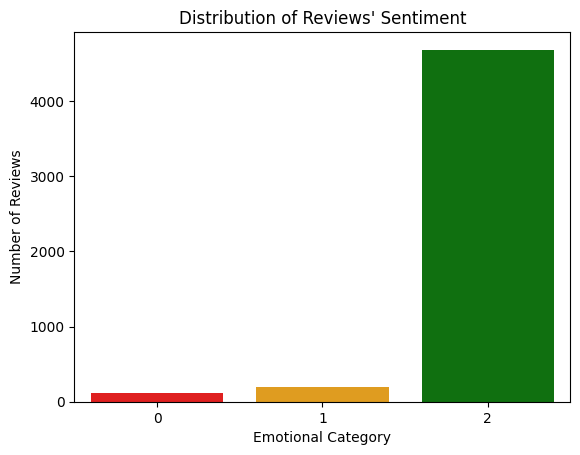

In [6]:
#Displaying the Sentiment Distribution Graph

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=data, x='sentiment', palette={'2': 'green', '1': 'orange', '0': 'red'})

plt.title("Distribution of Reviews' Sentiment")
plt.xlabel("Emotional Category")
plt.ylabel("Number of Reviews")
plt.show()

## Task 1. Classification with pre-trained models.

- Select the model

- Finetune it

- Evaluate

- Save the best model

#### Model Building

- For classifying customer reviews into positive, negative, or neutral, use pretrained transformer-based models to leverage powerful language representations without training from scratch.

####  Models

- distilbert-base-uncased – Lightweight and fast, ideal for limited resources.
- roberta-base – More robust to nuanced sentiment variations.

1.Select the Model

In [7]:
# Importing necessary libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Select model: DistilBERT
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model_distilbert = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=3  # We have 3 classes: Positive, Neutral, Negative
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


2.Finetune it

Data preparation:Preparation

In [8]:
!pip install datasets

In [9]:
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Load your preprocessed data (Ensure you have 'text' and 'label' columns)
def read_and_split_data():
  data = pd.read_csv("cleaned_reviews.csv")

  # Split data into train and test
  train_df, test_df = train_test_split(data, test_size=0.19, random_state=42, stratify=data["sentiment"])#19

  # Convert to HuggingFace datasets
  train_dataset = Dataset.from_pandas(train_df)
  test_dataset = Dataset.from_pandas(test_df)
  return train_dataset, test_dataset


In [10]:
train_dataset, test_dataset = read_and_split_data()

# Get the number of examples in the train and test datasets
train_size = len(train_dataset)
test_size = len(test_dataset)

print(f"Training dataset size: {train_size}")
print(f"Test dataset size: {test_size}")


Training dataset size: 4050
Test dataset size: 950


Tokenization:

In [11]:
# Tokenizing the text (necessary before training)
def tokenize_function(examples):
    return tokenizer_distilbert(examples["reviews.text"], padding="max_length", truncation=True)

# Apply tokenization for DistilBERT
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Get the number of examples in the train dataset after tokenization
train_size = len(train_dataset)
print(f"Training dataset size after tokenization: {train_size}")


Map:   0%|          | 0/4050 [00:00<?, ? examples/s]

Map:   0%|          | 0/950 [00:00<?, ? examples/s]

Training dataset size after tokenization: 4050


In [12]:
test_dataset


Dataset({
    features: ['reviews.text', 'reviews.rating', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 950
})

Start training with Trainer:

In [13]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import torch
# from transformers import Trainer, TrainingArguments
# from imblearn.over_sampling import SMOTE
# from sklearn.model_selection import train_test_split
# from datasets import Dataset
# import numpy as np

# # Compute metrics function (accuracy, precision, recall, f1)
# def compute_metrics(p):
#     predictions, labels = p

#     # Convert predictions to tensor if they are numpy arrays
#     predictions = torch.tensor(predictions) if not isinstance(predictions, torch.Tensor) else predictions

#     # Get predicted labels by applying argmax
#     preds = torch.argmax(predictions, dim=1)  # Get predicted labels

#     # Compute accuracy
#     accuracy = accuracy_score(labels, preds)

#     # Compute precision, recall, and f1
#     precision = precision_score(labels, preds, average='weighted', zero_division=1)
#     recall = recall_score(labels, preds, average='weighted', zero_division=1)
#     f1 = f1_score(labels, preds, average='weighted', zero_division=1)

#     return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}  # Return all metrics

In [14]:
# # Ensure train_dataset is a Dataset from HuggingFace `datasets` library
# # Convert train_dataset into Dataset if it's a tuple or non-Dataset type
# if isinstance(train_dataset, tuple):
#     train_dataset = Dataset.from_dict({
#         'input_ids': train_dataset[0],  # Assuming train_dataset[0] is the input_ids
#         'sentiment': train_dataset[1]   # Assuming train_dataset[1] is the sentiment labels
#     })

# # SMOTE (Synthetic Minority Over-sampling Technique) for oversampling minority class
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Convert 'input_ids' and 'sentiment' columns to NumPy arrays for SMOTE
# X_train = np.array(train_dataset['input_ids'])
# y_train = np.array(train_dataset['sentiment'])  # Ensure you use 'sentiment' instead of 'label'

# # Apply SMOTE to oversample the minority class
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Print details after applying SMOTE
# print(f"Resampled X_train shape: {X_train_resampled.shape}")
# print(f"Resampled y_train shape: {y_train_resampled.shape}")

# # Reformat the resampled data into a Dataset object (Ensure the input format is compatible)
# train_dataset_resampled = Dataset.from_dict({
#     'input_ids': X_train_resampled.tolist(),  # Convert back to lists if necessary
#     'sentiment': y_train_resampled.tolist()   # Ensure the correct column name here
# })

# # Ensure all datasets are of type Dataset and check the columns
# print(f"train_dataset_resampled columns: {train_dataset_resampled.column_names}")
# print(f"test_dataset columns: {test_dataset.column_names}")
# print(f"train_dataset_resampled shape: {train_dataset_resampled.shape}")


Resampled X_train shape: (11388, 512)
Resampled y_train shape: (11388,)
train_dataset_resampled columns: ['input_ids', 'sentiment']
test_dataset columns: ['reviews.text', 'reviews.rating', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask']
train_dataset_resampled shape: (11388, 2)


In [15]:
_, counts = np.unique(y_train_resampled, return_counts=True)
counts

array([3796, 3796, 3796])

In [19]:
# from transformers import Trainer, TrainingArguments

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",  # Output directory for the model checkpoints
#     eval_strategy="epoch",  # Evaluate after each epoch
#     learning_rate=2e-5,  # Learning rate for optimization
#     per_device_train_batch_size=8,  # Batch size per device
#     num_train_epochs=3,  # Number of training epochs
#     weight_decay=0.01,  # Weight decay to prevent overfitting
#     logging_dir="./logs",  # Log directory for monitoring training
#     report_to=["none"]
# )


# # Trainer for DistilBERT
# trainer_distilbert = Trainer(
#     model=model_distilbert,
#     args=training_args,
#     train_dataset=train_dataset_resampled,
#     eval_dataset=test_dataset,
#     compute_metrics=compute_metrics,  # Include the compute_metrics function here
# )
# print("Trainer for DistilBERT")
# # Fine-tune the DistilBERT model
# trainer_distilbert.train()

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from transformers import Trainer, TrainingArguments
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from datasets import Dataset
import numpy as np

# Compute metrics function (accuracy, precision, recall, f1)
def compute_metrics(p):
    predictions, labels = p

    # Convert predictions to tensor if they are numpy arrays
    predictions = torch.tensor(predictions) if not isinstance(predictions, torch.Tensor) else predictions

    # Get predicted labels by applying argmax
    preds = torch.argmax(predictions, dim=1)  # Get predicted labels

    # Compute accuracy
    accuracy = accuracy_score(labels, preds)

    # Compute precision, recall, and f1
    precision = precision_score(labels, preds, average='weighted', zero_division=1)
    recall = recall_score(labels, preds, average='weighted', zero_division=1)
    f1 = f1_score(labels, preds, average='weighted', zero_division=1)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}  # Return all metrics

In [23]:
# Ensure train_dataset is a Dataset from HuggingFace `datasets` library
# Convert train_dataset into Dataset if it's a tuple or non-Dataset type
if isinstance(train_dataset, tuple):
    train_dataset = Dataset.from_dict({
        'input_ids': train_dataset[0],  # Assuming train_dataset[0] is the input_ids
        'label': train_dataset[1]      # Assuming train_dataset[1] is the labels
    })


# SMOTE (Synthetic Minority Over-sampling Technique) for oversampling minority class # gotta read about it
smote = SMOTE(sampling_strategy='auto', random_state=42)

print(train_dataset)
# Convert 'input_ids' and 'label' columns to NumPy arrays for SMOTE
X_train = np.array(train_dataset['input_ids'])
y_train = np.array(train_dataset['sentiment'])

# SMOTE to oversample the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(X_train_resampled.shape, test_dataset.shape)

# Reformat the resampled data into a Dataset object (Ensure the input format is compatible)
train_dataset_resampled = Dataset.from_dict({
    'input_ids': X_train_resampled.tolist(),  # Convert back to lists if necessary
    'label': y_train_resampled.tolist()      # Convert labels to list
})

# Ensure all datasets are of type Dataset
print(f"train_dataset_resampled columns: {train_dataset_resampled.column_names}")
print(f"test_dataset columns: {test_dataset.column_names}")
print(train_dataset_resampled.shape)

Dataset({
    features: ['reviews.text', 'reviews.rating', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 4050
})
(11388, 512) (950, 6)
train_dataset_resampled columns: ['input_ids', 'label']
test_dataset columns: ['reviews.text', 'reviews.rating', 'sentiment', '__index_level_0__', 'input_ids', 'attention_mask']
(11388, 2)


In [29]:
from transformers import Trainer, TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",  # Output directory for the model checkpoints
    eval_strategy="steps",  # Evaluate after every N steps(reduces repetitive evaluations)
    eval_steps=500, # Number of steps between ratings
    learning_rate=2e-5,  # Learning rate for optimization
    per_device_train_batch_size=16,  # Increase batch size
    num_train_epochs=2,  # Reduce the number of repetitions
    weight_decay=0.01,  # Weight decay to prevent overfitting
    logging_dir="./logs",  # Log directory for monitoring training
    logging_steps=100, # Reduce the number of log steps
    report_to=["none"],  # To stop exporting to other reports
    gradient_accumulation_steps=2,  # Combine gradients to reduce memory load
    fp16=True  # Use FP16 to speed up training (if your device supports it)
)

# Trainer for DistilBERT
trainer_distilbert = Trainer(
    model=model_distilbert,
    args=training_args,
    train_dataset=train_dataset_resampled,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,  # Include the compute_metrics function here
)
print("Trainer for DistilBERT")
# Fine-tune the DistilBERT model
trainer_distilbert.train()

In [24]:
# from transformers import Trainer, TrainingArguments

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir="./results",  # Output directory for the model checkpoints
#     eval_strategy="steps",  # Evaluate after every N steps(reduces repetitive evaluations)
#     eval_steps=500, # Number of steps between ratings
#     learning_rate=2e-5,  # Learning rate for optimization
#     per_device_train_batch_size=16,  # Increase batch size
#     num_train_epochs=2,  # Reduce the number of repetitions
#     weight_decay=0.01,  # Weight decay to prevent overfitting
#     logging_dir="./logs",  # Log directory for monitoring training
#     logging_steps=100, # Reduce the number of log steps
#     report_to=["none"],  # To stop exporting to other reports
#     gradient_accumulation_steps=2,  # Combine gradients to reduce memory load
#     fp16=True  # Use FP16 to speed up training (if your device supports it)
# )

# # Trainer for DistilBERT
# trainer_distilbert = Trainer(
#     model=model_distilbert,
#     args=training_args,
#     train_dataset=train_dataset_resampled,
#     eval_dataset=test_dataset,
#     compute_metrics=compute_metrics,  # Include the compute_metrics function here
# )

# print("Trainer for DistilBERT")
# # Fine-tune the DistilBERT model
# trainer_distilbert.train()


In [31]:
# print(train_dataset_resampled['labels'][:10])

3.Evaluate the model

In [32]:
# Evaluate the best model (DistilBERT)
# Get the predictions and labels from the test set
predictions, _, _ = trainer_distilbert.predict(test_dataset)

# Convert predictions to numpy array and get the predicted labels
predictions = np.argmax(predictions, axis=1)  # Convert logits to predicted class labels

predictions


In [33]:
# Compute metrics: accuracy, precision, recall, and F1 score
labels = test_dataset['labels']
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted', zero_division=1)
recall = recall_score(labels, predictions, average='weighted', zero_division=1)
f1 = f1_score(labels, predictions, average='weighted', zero_division=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(labels, predictions)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(labels, predictions, target_names=['Negative', 'Neutral', 'Positive']))


4.Save the best model

In [35]:
save_path = '/content/drive/MyDrive/ProjectNLB/distilbert_model'

In [36]:
# Save the model
model_distilbert.save_pretrained(save_path)

# Save the tokenizer
tokenizer_distilbert.save_pretrained(save_path)